PROGRAMA DE SOLUCION NUMERICA 

Tamaño de paso 'h': 0.05

   i    |  t[i]   |           y[i]           |  SOL. Numerica y[i+1]    |       SOL. Exacta        |     ERROR RELATIVO.      | ERROR ABSOLUTO.
-------------------------------------------------------------------------------------------------------------------------------------------------------
   0    |   0.0   |           1.0            |           1.0            |    1.001252344726868     |  0.0012507783212328944   | 0.001252344726867971
   1    |  0.05   |           1.0            |        1.00250625        |    1.0050375625782033    |  0.0025186248479209623   | 0.002531312578203382
   2    |   0.1   |        1.00250625        |    1.0075687812499998    |    1.0114405576708343    |   0.003827982170055032   | 0.003871776420834472
   3    |  0.15   |    1.0075687812499998    |    1.0152942971093748    |    1.0206040200802673    |   0.005202529939549818   | 0.005309722970892494
   4    |   0.2   |    1.0152942971093748    |    

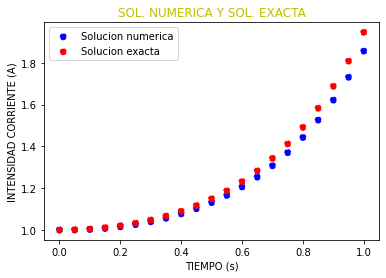

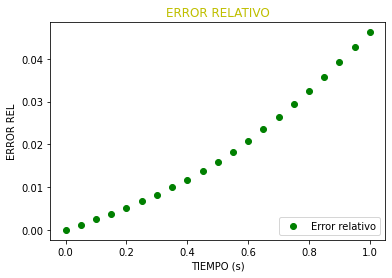

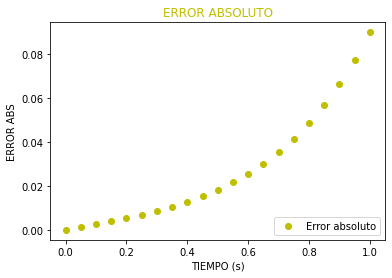

El tiempo de ejecucion en segundos fue: 0.6070330142974854


In [ ]:
"METODO EULER EDO (ORDEN 1)"

import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import sin
from sympy import cos
from time import time                                                                     

print('PROGRAMA DE SOLUCION NUMERICA','\n')
def derivada(t,x):                                                                # definir la ecuacion diferencial de primer orden f(t,x) = dx/dt = ec
    ec = t*x + t**3
    return ec

def solucionexacta(t,x):
    ec = -t**2 + 3*math.exp((t**2)/2) - 2                                         # solucion exacta encontrado en https://es.symbolab.com/solver/
    return ec


# PARAMETROS INICIALES.
h = float(input("Tamaño de paso 'h': ",))
print('')
tiempo_inicial = time() # inicio conteo de tiempo
s = 1.0             #Tiempo final - Tiempo inicial
n = int((s/h)+1)    # n debe ser entero para el orden matricial
t = np.zeros(n)     # definiendo matrices de ceros t,x,xxx,w,z4,z44
x = np.zeros(n)
xxx = np.zeros(n)   # solucion numerica
w = np.zeros(n)     # solucion exacta
z4 = np.zeros(n)    # error relativo
z44 = np.zeros(n)   # error absoluto
t[0]=0              # valores iniciales t,xxx,w
xxx[0]=1  
w[0]=1

# TABLA DEL PROCESO.
print('{:^7} | {:^7} | {:^24} | {:^24} | {:^24} | {:^24} | {:^15}'.format('i','t[i]','y[i]','SOL. Numerica y[i+1] ','SOL. Exacta', 'ERROR RELATIVO.', 'ERROR ABSOLUTO.'))
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

# METODO NUMERICO EULER.
for i in np.arange(1,n):      
    xxx[i]=xxx[i-1] + (h)*derivada(t[i-1],xxx[i-1])           # METODO EULER EDO1 
    t[i]=round(t[i-1] + h,3)                                  # tiempo con 3 decimales fijos
    w[i]=solucionexacta(t[i],x[i])
    z4[i]=abs((w[i]-xxx[i])/w[i])                             #ERROR RELATIVO EDO1
    z44[i]=abs(w[i]-xxx[i])                                   #ERROR ABSOLUTO EDO1
    print('{:^7} | {:^7} | {:^24} | {:^24} | {:^24} | {:^24} | {:^15}'.format(i-1,t[i-1],xxx[i-1],xxx[i],w[i],z4[i],z44[i]))

# PLOT SOLUCION NUMERICA VS REAL.
plt.scatter(t,xxx,color='blue', marker='o', linestyle='--', label="Solucion numerica")
plt.scatter(t,w,color='red', marker='o', linestyle='--', label="Solucion exacta")
plt.title('SOL. NUMERICA Y SOL. EXACTA' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('INTENSIDAD CORRIENTE (A)')
plt.legend()
plt.show()


# PLOT ERROR RELATIVO.
plt.scatter(t,z4,color='green',label="Error relativo")
plt.title('ERROR RELATIVO' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('ERROR REL')
plt.legend(loc=4)
plt.show()

# PLOT ERROR ABSOLUTO.
plt.scatter(t,z44,color='y',label="Error absoluto")
plt.title('ERROR ABSOLUTO' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('ERROR ABS')
plt.legend(loc=4)
plt.show()

# CALCULO DE TIEMPO DE EJECUCION.
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print ('El tiempo de ejecucion en segundos fue:',tiempo_ejecucion) # fin conteo de tiempo